# **CARE: Content-aware image restoration (3D)**

---

<font size = 4>CARE is a neural network capable of image restoration from corrupted bio-images, first published in 2018 by [Weigert *et al.* in Nature Methods](https://www.nature.com/articles/s41592-018-0216-7).  The CARE network uses a U-Net network architecture and allows image restoration and resolution improvement in 2D and 3D images, in a supervised manner, using noisy images as input and low-noise images as targets for training. The function of the network is essentially determined by the set of images provided in the training dataset. For instance, if noisy images are provided as input and high signal-to-noise ratio images are provided as targets, the network will perform denoising.

<font size = 4> **This particular notebook enables restoration of 3D dataset. If you are interested in restoring 2D dataset, you should use the CARE 2D notebook instead.**

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the following paper:

<font size = 4>**Content-aware image restoration: pushing the limits of fluorescence microscopy**, by Weigert *et al.* published in Nature Methods in 2018 (https://www.nature.com/articles/s41592-018-0216-7)

<font size = 4>And source code found in: https://github.com/csbdeep/csbdeep

<font size = 4>For a more in-depth description of the features of the network,please refer to [this guide](http://csbdeep.bioimagecomputing.com/doc/) provided by the original authors of the work.

<font size = 4>We provide a dataset for the training of this notebook as a way to test its functionalities but the training and test data of the restoration experiments is also available from the authors of the original paper [here](https://publications.mpi-cbg.de/publications-sites/7207/).

<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
### **Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
### **Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here.

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
### **Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---
<font size = 4> For CARE to train, **it needs to have access to a paired training dataset**. This means that the same image needs to be acquired in the two conditions (for instance, low signal-to-noise ratio and high signal-to-noise ratio) and provided with indication of correspondence.

<font size = 4> Therefore, the data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Low SNR images" (Training_source) and "Training - high SNR images" (Training_target). Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4> **Additionally, the corresponding input and output files need to have the same name**.

<font size = 4> Please note that you currently can **only use .tif files!**

<font size = 4> You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed.


<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Low SNR images (Training_source)
        - img_1.tif, img_2.tif, ...
      - High SNR images (Training_target)
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Low SNR images
        - img_1.tif, img_2.tif
      - High SNR images
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install CARE and dependencies**
---


## **1.1. Install key dependencies**
---
<font size = 4>

In [ ]:
#@markdown ##Install CARE and dependencies
!pip uninstall -y -q tensorflow
!pip install -q tensorflow==2.8

import tensorflow

#!pip uninstall -y -q keras-nightly

!pip3 install -q h5py==2.10.0

#Here, we install libraries which are not already included in Colab.
!pip install -q tifffile # contains tools to operate tiff-files
!pip install -q csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.
!pip install -q wget
!pip install -q fpdf2
!pip install -q memory_profiler
!pip install -q imagecodecs

#Force session restart
exit(0)



  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
ERROR: Could not build wheels for h5py, which is required to install pyproject.toml-based projects



## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>






## **1.3. Load key dependencies**
---
<font size = 4>

In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division

#@markdown ##Load key dependencies

Notebook_version = '1.15.2'
Network = 'CARE (3D)'


from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list]
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item)

    file.close()

import sys
before = [str(m) for m in sys.modules]

#Here, we import and enable Tensorflow 2.
import tensorflow
import tensorflow as tf

print(tensorflow.__version__)
print("Tensorflow enabled.")

# ------- Variable specific to CARE -------
from csbdeep.utils import download_and_extract_zip_file, normalize, plot_some, axes_dict, plot_history, Path, download_and_extract_zip_file
from csbdeep.data import RawData, create_patches
from csbdeep.io import load_training_data, save_tiff_imagej_compatible
from csbdeep.models import Config, CARE
from csbdeep import data
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil
import zipfile
from tifffile import imread, imsave
import time
import sys
import wget
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from skimage.util import img_as_ubyte
from tqdm import tqdm
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess
import imagecodecs


# For sliders and dropdown menu and progress bar
from ipywidgets import interact
import ipywidgets as widgets

#Create a variable to get and store relative base path
base_path = os.getcwd()

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'

W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries installed")

# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")


def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')


  #model_name = 'little_CARE_test'
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  # add another cell
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras','csbdeep']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  try:
    cuda_version = subprocess.run(["nvcc","--version"],stdout=subprocess.PIPE)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  except:
    cuda_version = ' - No cuda found - '
  try:
    gpu_name = subprocess.run(["nvidia-smi"],stdout=subprocess.PIPE)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  except:
    gpu_name = ' - No GPU found - '
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size*number_of_patches)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_height)+','+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  #text = 'The '+Network+' model ('+model_name+') was trained using '+str(dataset_size)+' paired images (image dimensions: '+str(shape)+') using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The GPU used was a '+gpu_name+'.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size*number_of_patches)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_height)+','+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by'
    if Rotation:
      aug_text = aug_text+'\n- rotation'
    if Flip:
      aug_text = aug_text+'\n- flipping'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.ln(1)
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>patch_height</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_patches</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{4}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_steps</td>
      <td width = 50%>{5}</td>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{6}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{7}</td>
    </tr>
  </table>
  """.format(number_of_epochs,patch_size,patch_height,number_of_patches,batch_size,number_of_steps,percentage_validation,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(32, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
  pdf.ln(1)
  exp_size = io.imread(base_path + '//TrainingDataExample_CARE3D.png').shape
  pdf.image(base_path + '/TrainingDataExample_CARE3D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- CARE: Weigert, Martin, et al. "Content-aware image restoration: pushing the limits of fluorescence microscopy." Nature methods 15.12 (2018): 1090-1097.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  # if Use_Data_augmentation:
  #   ref_3 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
  #   pdf.multi_cell(190, 5, txt = ref_3, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')

  Network = 'CARE 3D'
  #model_name = os.path.basename(QC_model_folder)
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  if os.path.exists(full_QC_model_path+'/Quality Control/lossCurvePlots.png'):
    pdf.image(full_QC_model_path+'/Quality Control/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/13))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    # pdf.ln(3)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(3)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="7" face="Courier" >
  <table width=97% style="margin-left:0px;">"""
  with open(full_QC_model_path+'/Quality Control/QC_metrics_'+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    slice_n = header[1]
    mSSIM_PvsGT = header[2]
    mSSIM_SvsGT = header[3]
    NRMSE_PvsGT = header[4]
    NRMSE_SvsGT = header[5]
    PSNR_PvsGT = header[6]
    PSNR_SvsGT = header[7]
    header = """
    <tr>
    <th width = 9% align="left">{0}</th>
    <th width = 4% align="left">{1}</th>
    <th width = 15% align="center">{2}</th>
    <th width = 14% align="left">{3}</th>
    <th width = 15% align="center">{4}</th>
    <th width = 14% align="left">{5}</th>
    <th width = 15% align="center">{6}</th>
    <th width = 14% align="left">{7}</th>
    </tr>""".format(image,slice_n,mSSIM_PvsGT,mSSIM_SvsGT,NRMSE_PvsGT,NRMSE_SvsGT,PSNR_PvsGT,PSNR_SvsGT)
    html = html+header
    for row in metrics:
      image = row[0]
      slice_n = row[1]
      mSSIM_PvsGT = row[2]
      mSSIM_SvsGT = row[3]
      NRMSE_PvsGT = row[4]
      NRMSE_SvsGT = row[5]
      PSNR_PvsGT = row[6]
      PSNR_SvsGT = row[7]
      cells = """
        <tr>
          <td width = 9% align="left">{0}</td>
          <td width = 4% align="center">{1}</td>
          <td width = 15% align="center">{2}</td>
          <td width = 14% align="center">{3}</td>
          <td width = 15% align="center">{4}</td>
          <td width = 14% align="center">{5}</td>
          <td width = 15% align="center">{6}</td>
          <td width = 14% align="center">{7}</td>
        </tr>""".format(image,slice_n,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)),str(round(float(NRMSE_PvsGT),3)),str(round(float(NRMSE_SvsGT),3)),str(round(float(PSNR_PvsGT),3)),str(round(float(PSNR_SvsGT),3)))
      html = html+cells
    html = html+"""</body></table>"""

  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- CARE: Weigert, Martin, et al. "Content-aware image restoration: pushing the limits of fluorescence microscopy." Nature methods 15.12 (2018): 1090-1097.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')

# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)

2.8.0
Tensorflow enabled.


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Libraries installed
Notebook version: 1.15.2
Latest notebook version: 1.15.2
This notebook is up-to-date.


# **2. Initialise the Colab session**
---


## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [ ]:
#@markdown ##Run this cell to check if you have GPU access
import tensorflow as tf

if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.')
  print('Did you change your runtime ?')
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Tue Jan  9 08:42:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              41W / 300W |    308MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+-----

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive.

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Follow the instructions.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.**


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>

# **3. Select your parameters and paths**

---


## **3.1. Setting main training parameters**
---
<font size = 4>



<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (Low SNR images) and Training_target (High SNR images or ground truth) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5>**Training Parameters**

<font size = 4>**`number of epochs`:** Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10-30) epochs, but a full training should run for 100-300 epochs. Evaluate the performance after training (see 5.). **Default value: 40**

<font size = 4>**`patch_size`:** CARE divides the image into patches for training. Input the size of the patches (length of a side). The value should be smaller than the dimensions of the image and divisible by 8.  **Default value: 80**

<font size = 4>**`patch_height`:** The value should be smaller than the Z dimensions of the image and divisible by 4. When analysing isotropic stacks  patch_size and patch_height should have similar values.

<font size = 4>**When choosing the patch_size and patch_height, the values should be i) large enough that they will enclose many instances, ii) small enough that the resulting patches fit into the RAM.**

<font size = 4>**If you get an Out of memory (OOM) error during the training,  manually decrease the patch_size and patch_height values until the OOM error disappear.**

<font size = 4>**`number_of_patches`:** Input the number of the patches per image. Increasing the number of patches allows for larger training datasets. **Default value: 200**

<font size = 4>**Decreasing the patch size or increasing the number of patches may improve the training but may also increase the training time.**

<font size = 5>**Advanced Parameters - experienced users only**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 16**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10**

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0004**

In [ ]:

#@markdown ###Path to training images:

# base folder of GT and low images
base = base_path

# low SNR images
Training_source = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/train_down" #@param {type:"string"}
lowfile = Training_source+"/*.tif"
# Ground truth images
Training_target = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/train_up" #@param {type:"string"}
GTfile = Training_target+"/*.tif"


# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "model_a" #@param {type:"string"}
model_path = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/model" #@param {type:"string"}


# create the training data file into model_path folder.
training_data = model_path+"/my_training_data.npz"

# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:

number_of_epochs =  300#@param {type:"number"}

#@markdown Patch size (pixels) and number
patch_size =  80#@param {type:"number"} # pixels in
patch_height =  8#@param {type:"number"}
number_of_patches =  50#@param {type:"number"}


#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please input:

batch_size =  16#@param {type:"number"}
number_of_steps =  300#@param {type:"number"}
percentage_validation =  10 #@param {type:"number"}
initial_learning_rate = 0.0004 #@param {type:"number"}


if (Use_Default_Advanced_Parameters):
  print("Default advanced parameters enabled")
  batch_size = 16
  percentage_validation = 10
  initial_learning_rate = 0.0004

percentage = percentage_validation/100


#here we check that no model with the same name already exist, if so print a warning

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.2"+W)


# Here we disable pre-trained model by default (in case the next cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)

Use_Data_augmentation = False


#Load one randomly chosen training source file

random_choice=random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)


# Here we check that the input images are stacks
if len(x.shape) == 3:
  print("Image dimensions (z,y,x)",x.shape)

if not len(x.shape) == 3:
  print(bcolors.WARNING +"Your images appear to have the wrong dimensions. Image dimension",x.shape)


#Find image Z dimension and select the mid-plane
Image_Z = x.shape[0]
mid_plane = int(Image_Z / 2)+1


#Find image XY dimension
Image_Y = x.shape[1]
Image_X = x.shape[2]

#Hyperparameters failsafes

# Here we check that patch_size is smaller than the smallest xy dimension of the image

if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is divisible by 8
if not patch_size % 8 == 0:
    patch_size = ((int(patch_size / 8)-1) * 8)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_height is smaller than the z dimension of the image

if patch_height > Image_Z :
  patch_height = Image_Z
  print (bcolors.WARNING + " Your chosen patch_height is bigger than the z dimension of your image; therefore the patch_size chosen is now:",patch_height)

# Here we check that patch_height is divisible by 4
if not patch_height % 4 == 0:
    patch_height = ((int(patch_height / 4)-1) * 4)
    if patch_height == 0:
      patch_height = 4
    print (bcolors.WARNING + " Your chosen patch_height is not divisible by 4; therefore the patch_size chosen is now:",patch_height)


#Load one randomly chosen training target file
y = imread(Training_target+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x[mid_plane], norm=simple_norm(x[mid_plane], percent = 99), interpolation='nearest')
plt.axis('off')
plt.title('Low SNR image (single Z plane)');
plt.subplot(1,2,2)
plt.imshow(y[mid_plane], norm=simple_norm(y[mid_plane], percent = 99), interpolation='nearest')
plt.axis('off')
plt.title('High SNR image (single Z plane)');
plt.savefig(base_path + '/TrainingDataExample_CARE3D.png',bbox_inches='tight',pad_inches=0)

Output hidden; open in https://colab.research.google.com to view.


## **3.2. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a CARE 3D model**.

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pret-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used.

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]

Weights_choice = "best" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")


# --------------------- Download the a model provided in the XXX ------------------------

  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = base_path + "/" + pretrained_model_name
    print("Downloading the 2D_Demo_Model_from_Stardist_2D_paper")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled,
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_last.h5 pretrained model does not exist')
    Use_pretrained_model = False


# If the model path contains a pretrain model, we load the training rate,
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)

        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead')

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead')
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained nerwork will be used.')



# **4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

!! WARNING: Model folder already exists and has been removed !!
   72 raw images x    1 transformations   =    72 images
   72 images     x   50 patches per image =  3600 patches in total
Input data:
/content: target='/content/gdrive/MyDrive/ColabNotebooks/2012_1024/train_up', sources=['/content/gdrive/MyDrive/ColabNotebooks/2012_1024/train_down'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
8 x 80 x 80


100%|██████████| 72/72 [44:00<00:00, 36.67s/it]


Saving data to /content/gdrive/MyDrive/ColabNotebooks/2012_1024/model/my_training_data.npz.
shape of X,Y = (3600, 1, 8, 80, 80)
axes  of X,Y = SCZYX
Creating 3D training dataset
number of training images:	 3240
number of validation images:	 360
image size (3D):		 (8, 80, 80)
axes:				 SZYXC
channels in / out:		 1 / 1
Config(n_dim=3, axes='ZYXC', n_channel_in=1, n_channel_out=1, train_checkpoint='weights_best.h5', train_checkpoint_last='weights_last.h5', train_checkpoint_epoch='weights_now.h5', probabilistic=False, unet_residual=True, unet_n_depth=2, unet_kern_size=3, unet_n_first=32, unet_last_activation='linear', unet_input_shape=(None, None, None, 1), train_loss='mae', train_epochs=300, train_steps_per_epoch=203, train_learning_rate=0.0004, train_batch_size=16, train_tensorboard=True, train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0})


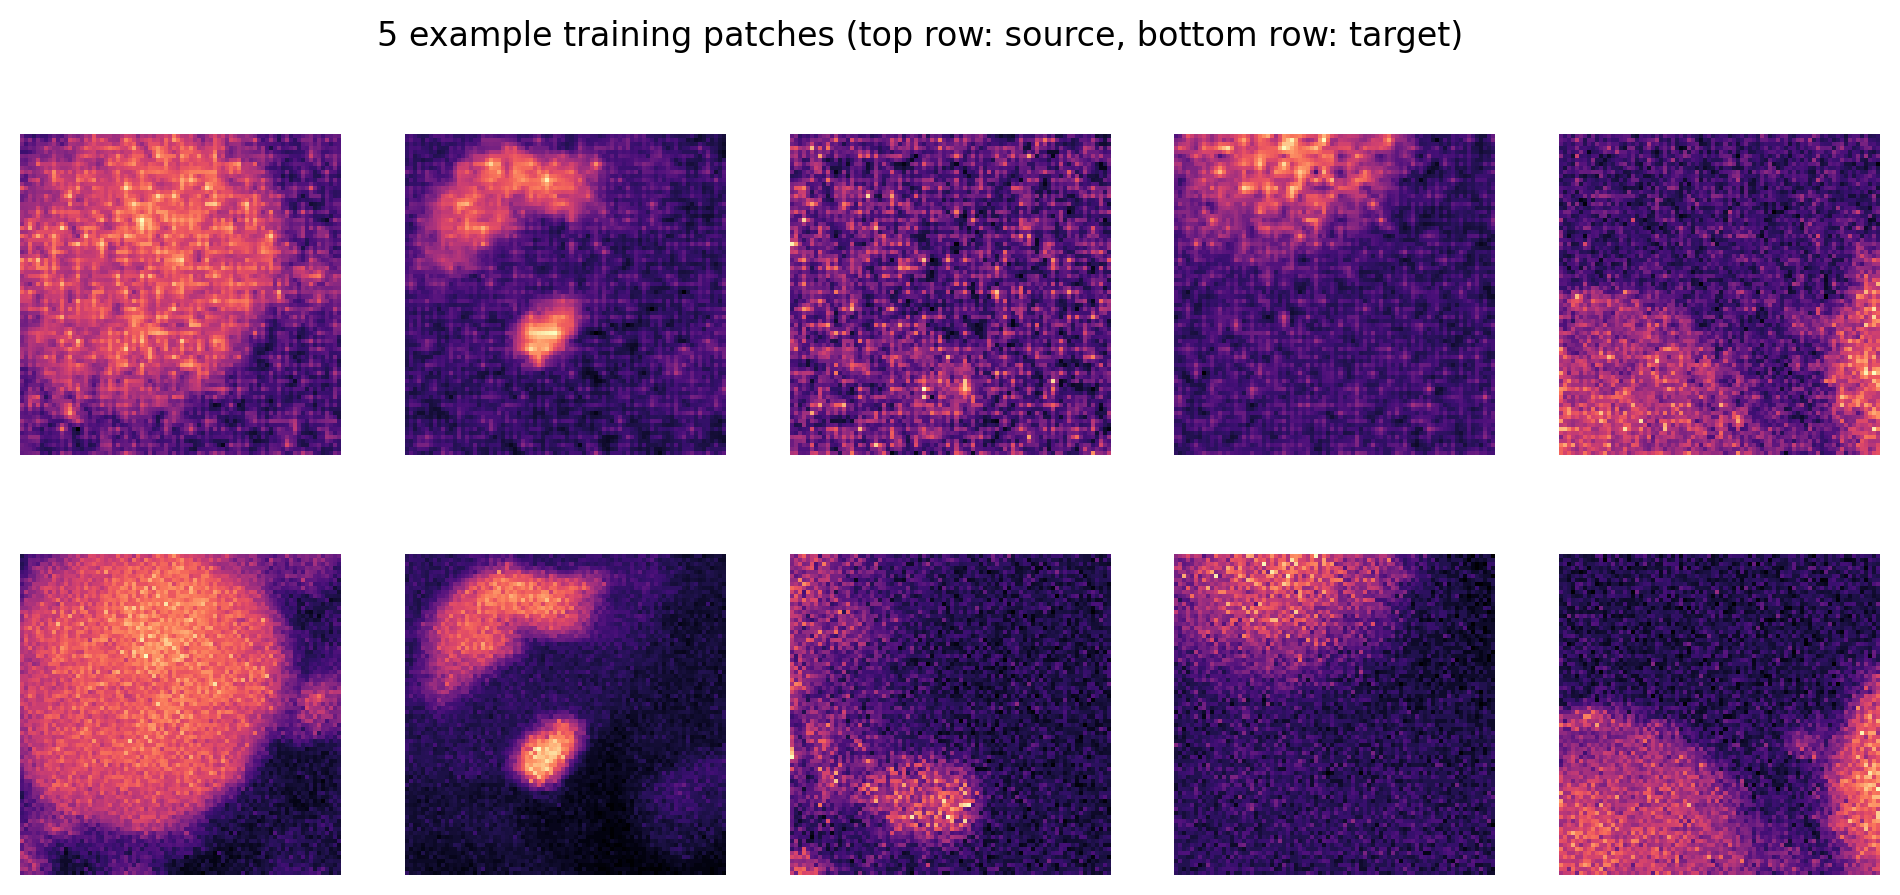

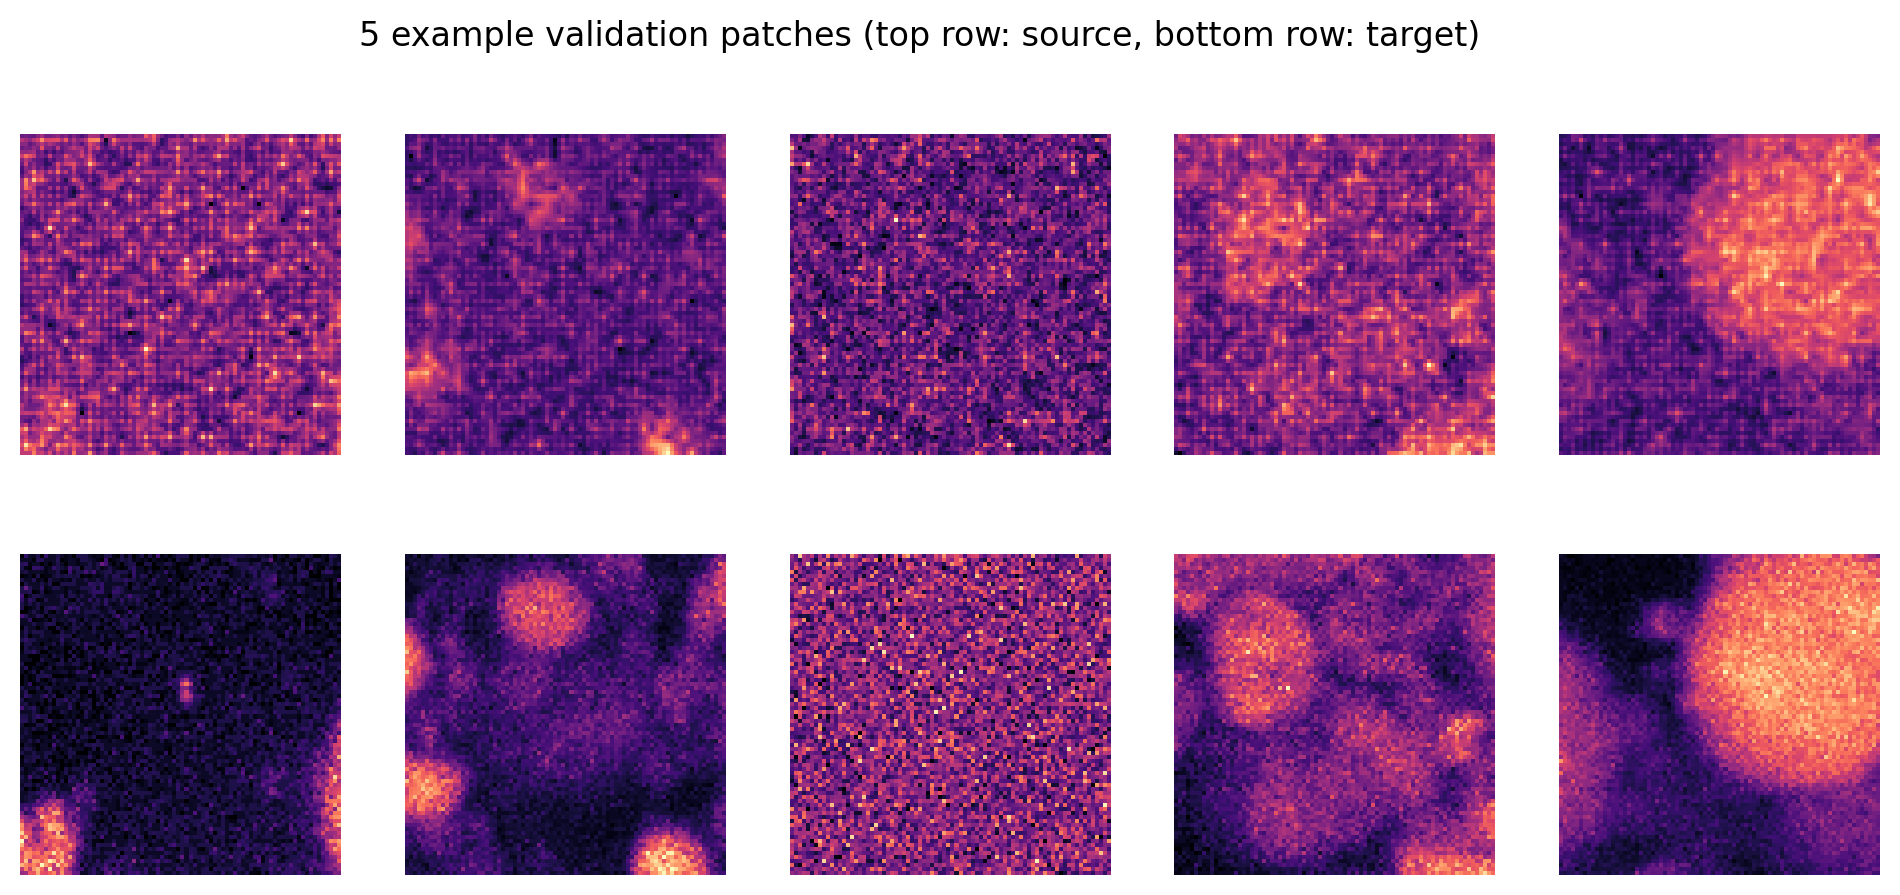

In [ ]:
#@markdown ##Create the model and dataset objects

# --------------------- Here we delete the model folder if it already exist ------------------------

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: Model folder already exists and has been removed !!" + W)
  shutil.rmtree(model_path+'/'+model_name)


# This object holds the image pairs (GT and low), ensuring that CARE compares corresponding images.
# This file is saved in .npz format and later called when loading the trainig data.


raw_data = RawData.from_folder (
    basepath    = base,
    source_dirs = [Training_source],
    target_dir  = Training_target,
    axes        = 'ZYX',
    pattern='*.tif*'
)
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (patch_height,patch_size,patch_size),
    n_patches_per_image = number_of_patches,
    save_file           = training_data,
)

assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

print ('Creating 3D training dataset')

# Load Training Data
(X,Y), (X_val,Y_val), axes = load_training_data(training_data, validation_split=percentage, verbose=True)
c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

#Plot example patches

#plot of training patches.
plt.figure(figsize=(12,5))
plot_some(X[:5],Y[:5])
plt.suptitle('5 example training patches (top row: source, bottom row: target)');

#plot of validation patches
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');


#Here we automatically define number_of_step in function of training data and batch size
if (Use_Default_Advanced_Parameters):
  number_of_steps= int(X.shape[0]/batch_size)+1


# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":
    initial_learning_rate = bestLearningRate
# --------------------- ---------------------- ------------------------


#Here, we create the default Config object which sets the hyperparameters of the network training.

config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs, train_batch_size=batch_size, train_learning_rate=initial_learning_rate)
print(config)
vars(config)

# Compile the CARE model for network training

model_training= CARE(config, model_name, basedir=model_path)

# --------------------- Using pretrained model ------------------------
# Load the pretrained weights
if Use_pretrained_model:
  model_training.load_weights(h5_file_path)
# --------------------- ---------------------- ------------------------

pdf_export(pretrained_model = Use_pretrained_model)

## **4.2. Start Training**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder from Google Drive as all data can be erased at the next training if using the same folder.



In [ ]:
#@markdown ##Start Training

start = time.time()

# Start Training
history = model_training.train(X,Y, validation_data=(X_val,Y_val))

print("Training, done.")

# convert the history.history dict to a pandas DataFrame:
lossData = pd.DataFrame(history.history)

if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

os.makedirs(model_path+"/"+model_name+"/Quality Control")

# The training evaluation.csv is saved (overwrites the Files if needed).
lossDataCSVpath = model_path+'/'+model_name+'/Quality Control/training_evaluation.csv'
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60)
hour, mins = divmod(mins, 60)
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#model_training.export_TF()

#print("Your model has been sucessfully exported and can now also be used in the CSBdeep Fiji plugin")

#Create a pdf document with training summary
pdf_export(trained=True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

Epoch 1/300


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x78755ff77880>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x78755ff77880>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x78755ff77f40>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x78755ff77f40>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x78755ff77640>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x78755ff77640>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  6/203 [..............................] - ETA: 18s - loss: 0.1390 - mse: 0.0376 - mae: 0.1390

203/203 [==============================] - 26s 109ms/step - loss: 0.0899 - mse: 0.0177 - mae: 0.0899 - val_loss: 0.0846 - val_mse: 0.0146 - val_mae: 0.0846 - lr: 4.0000e-04
Epoch 2/300
203/203 [==============================] - 22s 108ms/step - loss: 0.0752 - mse: 0.0133 - mae: 0.0752 - val_loss: 0.0776 - val_mse: 0.0145 - val_mae: 0.0776 - lr: 4.0000e-04
Epoch 3/300
203/203 [==============================] - 22s 108ms/step - loss: 0.0720 - mse: 0.0126 - mae: 0.0720 - val_loss: 0.0748 - val_mse: 0.0133 - val_mae: 0.0748 - lr: 4.0000e-04
Epoch 4/300
203/203 [==============================] - 22s 107ms/step - loss: 0.0708 - mse: 0.0123 - mae: 0.0708 - val_loss: 0.0744 - val_mse: 0.0134 - val_mae: 0.0744 - lr: 4.0000e-04
Epoch 5/300
203/203 [==============================] - 22s 108ms/step - loss: 0.0705 - mse: 0.0123 - mae: 0.0705 - val_loss: 0.0740 - val_mse: 0.0134 - val_mae: 0.0740 - lr: 4.0000e-04
Epoch 6/300
203/203 [==============================] - 21s 105ms/step - loss: 0.0695 - 

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model.

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [ ]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model):
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The model_a network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

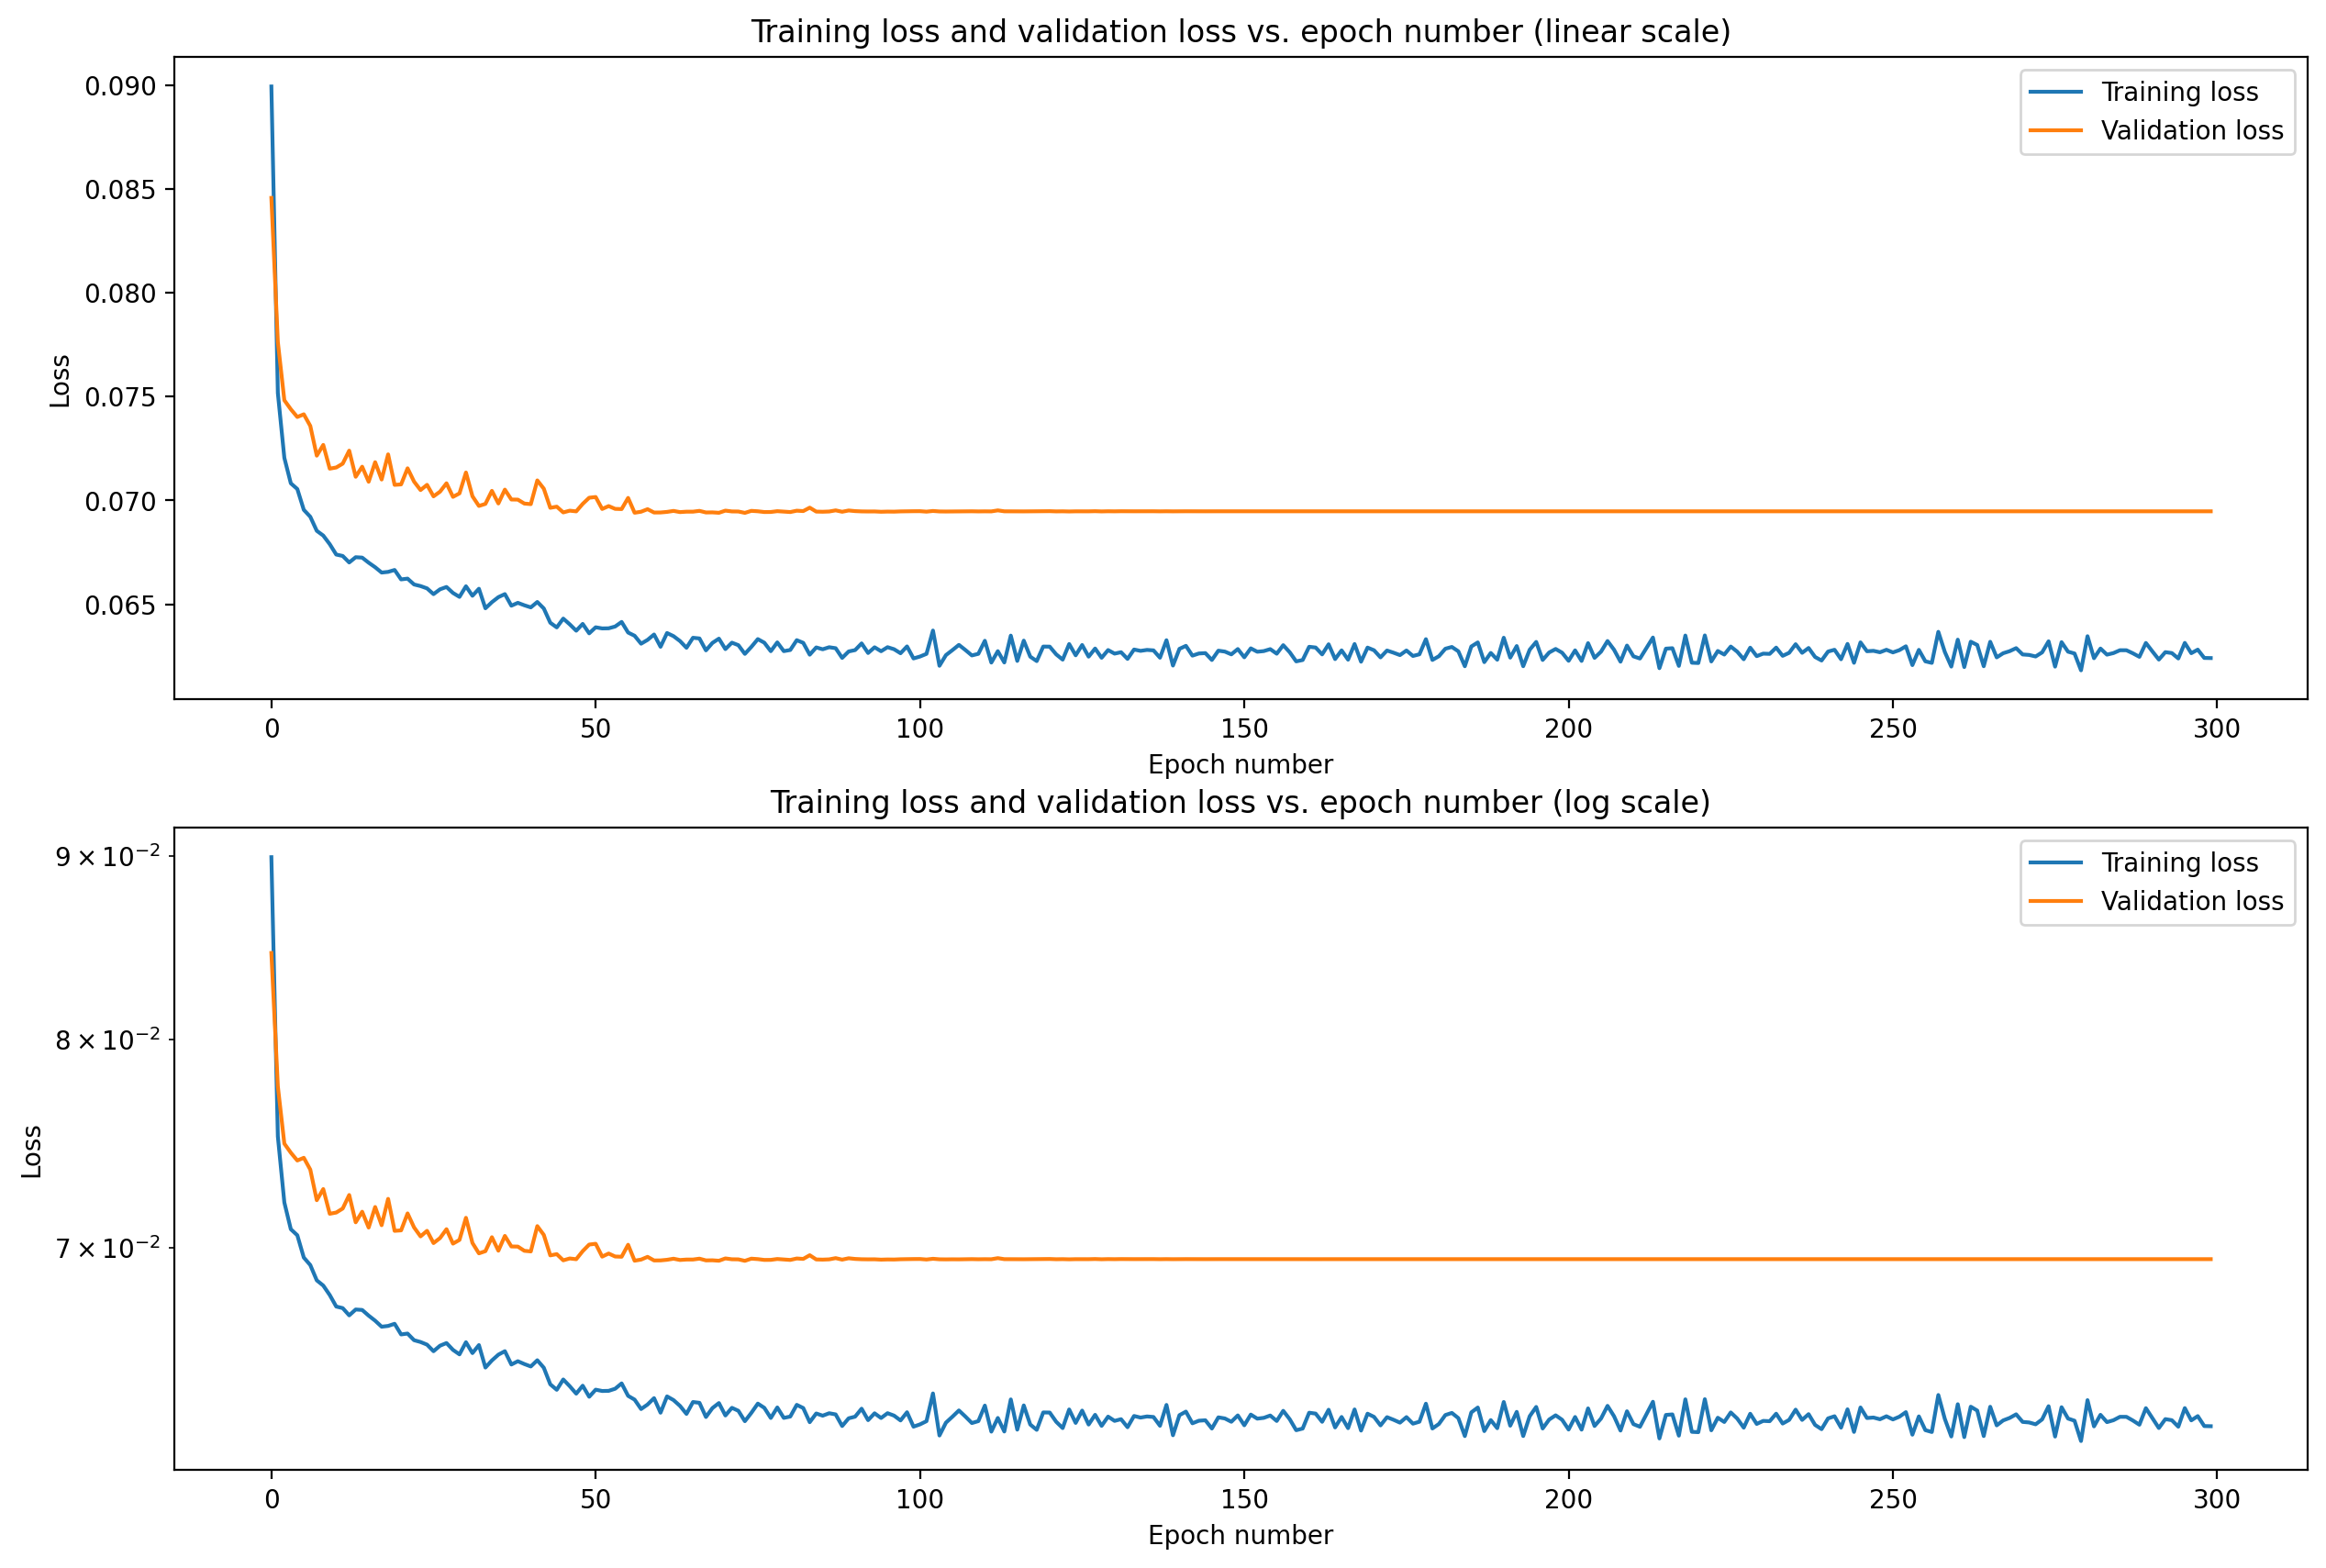

In [ ]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png')
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---

<font size = 4>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "Source_QC_folder" and "Target_QC_folder" !

<font size = 4>**1. The SSIM (structural similarity) map**

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info).

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map**

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**





In [ ]:
#@markdown ##Choose the folders that contain your Quality Control dataset


Source_QC_folder = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/test_down" #@param{type:"string"}
Target_QC_folder = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/test_up" #@param{type:"string"}

path_metrics_save = QC_model_path+'/'+QC_model_name+'/Quality Control/'

# Create a quality control/Prediction Folder
if os.path.exists(path_metrics_save+'Prediction'):
  shutil.rmtree(path_metrics_save+'Prediction')
os.makedirs(path_metrics_save+'Prediction')

#Here we allow the user to choose the number of tile to be used when predicting the images
#@markdown #####To analyse large image, your images need to be divided into tiles.  Each tile will then be processed independently and re-assembled to generate the final image. "Automatic_number_of_tiles" will search for and use the smallest number of tiles that can be used, at the expanse of your runtime. Alternatively, manually input the number of tiles in each dimension to be used to process your images.

Automatic_number_of_tiles = True #@param {type:"boolean"}
#@markdown #####If you get an Out of memory (OOM) error when using the "Automatic_number_of_tiles" option, disable it and manually input the values to be used to process your images.  Progressively increases these numbers until the OOM error disappear.
n_tiles_Z =  1#@param {type:"number"}
n_tiles_Y =  2#@param {type:"number"}
n_tiles_X =  2#@param {type:"number"}

if (Automatic_number_of_tiles):
  n_tilesZYX = None

if not (Automatic_number_of_tiles):
  n_tilesZYX = (n_tiles_Z, n_tiles_Y, n_tiles_X)

# Activate the pretrained model.
model_training = CARE(config=None, name=QC_model_name, basedir=QC_model_path)

# List Tif images in Source_QC_folder
Source_QC_folder_tif = Source_QC_folder+"/*.tif"
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))
print('Number of test dataset found in the folder: '+str(len(Z)))


# Perform prediction on all datasets in the Source_QC folder
for filename in os.listdir(Source_QC_folder):
  img = imread(os.path.join(Source_QC_folder, filename))
  n_slices = img.shape[0]
  predicted = model_training.predict(img, axes='ZYX', n_tiles=n_tilesZYX)
  imsave(path_metrics_save+'Prediction/Predicted_'+filename, predicted)


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized

    Parameters
    ----------
    gt: ndarray
        the ground truth image
    x: ndarray
        the image that will be affinely scaled
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x



# Open and create the csv file that will contain all the QC metrics
with open(path_metrics_save+'QC_metrics_'+QC_model_name+".csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    writer.writerow(["File name","Slice #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR"])

    # These lists will be used to collect all the metrics values per slice
    file_name_list = []
    slice_number_list = []
    mSSIM_GvP_list = []
    mSSIM_GvS_list = []
    NRMSE_GvP_list = []
    NRMSE_GvS_list = []
    PSNR_GvP_list = []
    PSNR_GvS_list = []

    # These lists will be used to display the mean metrics for the stacks
    mSSIM_GvP_list_mean = []
    mSSIM_GvS_list_mean = []
    NRMSE_GvP_list_mean = []
    NRMSE_GvS_list_mean = []
    PSNR_GvP_list_mean = []
    PSNR_GvS_list_mean = []

    # Let's loop through the provided dataset in the QC folders
    for thisFile in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder, thisFile)):
        print('Running QC on: '+thisFile)

        test_GT_stack = io.imread(os.path.join(Target_QC_folder, thisFile))
        test_source_stack = io.imread(os.path.join(Source_QC_folder,thisFile))
        test_prediction_stack = io.imread(os.path.join(path_metrics_save+"Prediction/",'Predicted_'+thisFile))
        n_slices = test_GT_stack.shape[0]

        # Calculating the position of the mid-plane slice
        z_mid_plane = int(n_slices / 2)+1

        img_SSIM_GTvsPrediction_stack = np.zeros((n_slices, test_GT_stack.shape[1], test_GT_stack.shape[2]))
        img_SSIM_GTvsSource_stack = np.zeros((n_slices, test_GT_stack.shape[1], test_GT_stack.shape[2]))
        img_RSE_GTvsPrediction_stack = np.zeros((n_slices, test_GT_stack.shape[1], test_GT_stack.shape[2]))
        img_RSE_GTvsSource_stack = np.zeros((n_slices, test_GT_stack.shape[1], test_GT_stack.shape[2]))

        for z in range(n_slices):
          # -------------------------------- Normalising the dataset --------------------------------

          test_GT_norm, test_source_norm = norm_minmse(test_GT_stack[z], test_source_stack[z], normalize_gt=True)
          test_GT_norm, test_prediction_norm = norm_minmse(test_GT_stack[z], test_prediction_stack[z], normalize_gt=True)

          # -------------------------------- Calculate the SSIM metric and maps --------------------------------

          # Calculate the SSIM maps and index
          index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = structural_similarity(test_GT_norm, test_prediction_norm, data_range=1.0, full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)
          index_SSIM_GTvsSource, img_SSIM_GTvsSource = structural_similarity(test_GT_norm, test_source_norm, data_range=1.0, full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)

          #Calculate ssim_maps
          img_SSIM_GTvsPrediction_stack[z] = img_as_float32(img_SSIM_GTvsPrediction, force_copy=False)
          img_SSIM_GTvsSource_stack[z] = img_as_float32(img_SSIM_GTvsSource, force_copy=False)


          # -------------------------------- Calculate the NRMSE metrics --------------------------------

          # Calculate the Root Squared Error (RSE) maps
          img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
          img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

          # Calculate SE maps
          img_RSE_GTvsPrediction_stack[z] = img_as_float32(img_RSE_GTvsPrediction, force_copy=False)
          img_RSE_GTvsSource_stack[z] = img_as_float32(img_RSE_GTvsSource, force_copy=False)

          # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
          NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
          NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))

          # Calculate the PSNR between the images
          PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
          PSNR_GTvsSource = psnr(test_GT_norm,test_source_norm,data_range=1.0)

          writer.writerow([thisFile, str(z),str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource), str(PSNR_GTvsPrediction), str(PSNR_GTvsSource)])

          # Collect values to display in dataframe output
          slice_number_list.append(z)
          mSSIM_GvP_list.append(index_SSIM_GTvsPrediction)
          mSSIM_GvS_list.append(index_SSIM_GTvsSource)
          NRMSE_GvP_list.append(NRMSE_GTvsPrediction)
          NRMSE_GvS_list.append(NRMSE_GTvsSource)
          PSNR_GvP_list.append(PSNR_GTvsPrediction)
          PSNR_GvS_list.append(PSNR_GTvsSource)

          if (z == z_mid_plane): # catch these for display
            SSIM_GTvsP_forDisplay = index_SSIM_GTvsPrediction
            SSIM_GTvsS_forDisplay = index_SSIM_GTvsSource
            NRMSE_GTvsP_forDisplay = NRMSE_GTvsPrediction
            NRMSE_GTvsS_forDisplay = NRMSE_GTvsSource

        # If calculating average metrics for dataframe output
        file_name_list.append(thisFile)
        mSSIM_GvP_list_mean.append(sum(mSSIM_GvP_list)/len(mSSIM_GvP_list))
        mSSIM_GvS_list_mean.append(sum(mSSIM_GvS_list)/len(mSSIM_GvS_list))
        NRMSE_GvP_list_mean.append(sum(NRMSE_GvP_list)/len(NRMSE_GvP_list))
        NRMSE_GvS_list_mean.append(sum(NRMSE_GvS_list)/len(NRMSE_GvS_list))
        PSNR_GvP_list_mean.append(sum(PSNR_GvP_list)/len(PSNR_GvP_list))
        PSNR_GvS_list_mean.append(sum(PSNR_GvS_list)/len(PSNR_GvS_list))

         # ----------- Change the stacks to 32 bit images -----------

        img_SSIM_GTvsSource_stack_32 = img_as_float32(img_SSIM_GTvsSource_stack, force_copy=False)
        img_SSIM_GTvsPrediction_stack_32 = img_as_float32(img_SSIM_GTvsPrediction_stack, force_copy=False)
        img_RSE_GTvsSource_stack_32 = img_as_float32(img_RSE_GTvsSource_stack, force_copy=False)
        img_RSE_GTvsPrediction_stack_32 = img_as_float32(img_RSE_GTvsPrediction_stack, force_copy=False)

        # ----------- Saving the error map stacks -----------
        io.imsave(path_metrics_save+'SSIM_GTvsSource_'+thisFile,img_SSIM_GTvsSource_stack_32)
        io.imsave(path_metrics_save+'SSIM_GTvsPrediction_'+thisFile,img_SSIM_GTvsPrediction_stack_32)
        io.imsave(path_metrics_save+'RSE_GTvsSource_'+thisFile,img_RSE_GTvsSource_stack_32)
        io.imsave(path_metrics_save+'RSE_GTvsPrediction_'+thisFile,img_RSE_GTvsPrediction_stack_32)

#Averages of the metrics per stack as dataframe output
pdResults = pd.DataFrame(file_name_list, columns = ["File name"])
pdResults["Prediction v. GT mSSIM"] = mSSIM_GvP_list_mean
pdResults["Input v. GT mSSIM"] = mSSIM_GvS_list_mean
pdResults["Prediction v. GT NRMSE"] = NRMSE_GvP_list_mean
pdResults["Input v. GT NRMSE"] = NRMSE_GvS_list_mean
pdResults["Prediction v. GT PSNR"] = PSNR_GvP_list_mean
pdResults["Input v. GT PSNR"] = PSNR_GvS_list_mean

# All data is now processed saved
Test_FileList = os.listdir(Source_QC_folder) # this assumes, as it should, that both source and target are named the same way

plt.figure(figsize=(20,20))
# Currently only displays the last computed set, from memory
# Target (Ground-truth)
plt.subplot(3,3,1)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))

# Calculating the position of the mid-plane slice
z_mid_plane = int(img_GT.shape[0] / 2)+1

plt.imshow(img_GT[z_mid_plane], norm=simple_norm(img_GT[z_mid_plane], percent = 99))
plt.title('Target (slice #'+str(z_mid_plane)+')')

# Source
plt.subplot(3,3,2)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source[z_mid_plane], norm=simple_norm(img_Source[z_mid_plane], percent = 99))
plt.title('Source (slice #'+str(z_mid_plane)+')')

#Prediction
plt.subplot(3,3,3)
plt.axis('off')
img_Prediction = io.imread(os.path.join(path_metrics_save+'Prediction/', 'Predicted_'+Test_FileList[-1]))
plt.imshow(img_Prediction[z_mid_plane], norm=simple_norm(img_Prediction[z_mid_plane], percent = 99))
plt.title('Prediction (slice #'+str(z_mid_plane)+')')

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between GT and Source
plt.subplot(3,3,5)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
img_SSIM_GTvsSource = io.imread(os.path.join(path_metrics_save, 'SSIM_GTvsSource_'+Test_FileList[-1]))
imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource[z_mid_plane], cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('mSSIM: '+str(round(SSIM_GTvsS_forDisplay,3)),fontsize=14)
plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#SSIM between GT and Prediction
plt.subplot(3,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
img_SSIM_GTvsPrediction = io.imread(os.path.join(path_metrics_save, 'SSIM_GTvsPrediction_'+Test_FileList[-1]))
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction[z_mid_plane], cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('mSSIM: '+str(round(SSIM_GTvsP_forDisplay,3)),fontsize=14)

#Root Squared Error between GT and Source
plt.subplot(3,3,8)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
img_RSE_GTvsSource = io.imread(os.path.join(path_metrics_save, 'RSE_GTvsSource_'+Test_FileList[-1]))
imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource[z_mid_plane], cmap = cmap, vmin=0, vmax = 1)
plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsS_forDisplay,3))+', PSNR: '+str(round(PSNR_GTvsSource,3)),fontsize=14)
#plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

#Root Squared Error between GT and Prediction
plt.subplot(3,3,9)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
img_RSE_GTvsPrediction = io.imread(os.path.join(path_metrics_save, 'RSE_GTvsPrediction_'+Test_FileList[-1]))
imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction[z_mid_plane], cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsP_forDisplay,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)
plt.savefig(full_QC_model_path+'/Quality Control/QC_example_data.png',bbox_inches='tight',pad_inches=0)

print('-----------------------------------')
print('Here are the average scores for the stacks you tested in Quality control. To see values for all slices, open the .csv file saved in the Quality Control folder.')
pdResults.head()


#Make a pdf summary of the QC results

qc_pdf_export()

Output hidden; open in https://colab.research.google.com to view.

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [ ]:

#@markdown ##Provide the path to your dataset and to the folder where the prediction will be saved, then play the cell to predict output on your unseen images.

Data_folder = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/pred" #@param {type:"string"}
Result_folder = "/content/gdrive/MyDrive/ColabNotebooks/2012_1024/output" #@param {type:"string"}


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)


if (Use_the_current_trained_model):
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


#Here we allow the user to choose the number of tile to be used when predicting the images
#@markdown #####To analyse large image, your images need to be divided into tiles.  Each tile will then be processed independently and re-assembled to generate the final image. "Automatic_number_of_tiles" will search for and use the smallest number of tiles that can be used, at the expanse of your runtime. Alternatively, manually input the number of tiles in each dimension to be used to process your images.

Automatic_number_of_tiles = True #@param {type:"boolean"}
#@markdown #####If you get an Out of memory (OOM) error when using the "Automatic_number_of_tiles" option, disable it and manually input the values to be used to process your images.  Progressively increases these numbers until the OOM error disappear.
n_tiles_Z =  1#@param {type:"number"}
n_tiles_Y =  2#@param {type:"number"}
n_tiles_X =  2#@param {type:"number"}

if (Automatic_number_of_tiles):
  n_tilesZYX = None

if not (Automatic_number_of_tiles):
  n_tilesZYX = (n_tiles_Z, n_tiles_Y, n_tiles_X)

#Activate the pretrained model.
model=CARE(config=None, name=Prediction_model_name, basedir=Prediction_model_path)

print("Restoring images...")

thisdir = Path(Data_folder)
outputdir = Path(Result_folder)
suffix = '.tif'

# r=root, d=directories, f = files
for r, d, f in os.walk(thisdir):
    for file in f:
        if ".tif" in file:
            print(os.path.join(r, file))

for r, d, f in os.walk(thisdir):
  for file in f:
    base_filename = os.path.basename(file)
    input_train = imread(os.path.join(r, file))
    pred_train = model.predict(input_train, axes='ZYX', n_tiles=n_tilesZYX)
    save_tiff_imagej_compatible(os.path.join(outputdir, base_filename), pred_train, axes='ZYX')

print("Images saved into the result folder:", Result_folder)

#Display an example

random_choice=random.choice(os.listdir(Data_folder))
x = imread(Data_folder+"/"+random_choice)

z_mid_plane = int(x.shape[0] / 2)+1

@interact
def show_results(file=os.listdir(Data_folder), z_plane=widgets.IntSlider(min=0, max=(x.shape[0]-1), step=1, value=z_mid_plane)):
  x = imread(Data_folder+"/"+file)
  y = imread(Result_folder+"/"+file)

  f=plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.imshow(x[z_plane], norm=simple_norm(x[z_plane], percent = 99), interpolation='nearest')
  plt.axis('off')
  plt.title('Noisy Input (single Z plane)');
  plt.subplot(1,2,2)
  plt.imshow(y[z_plane], norm=simple_norm(y[z_plane], percent = 99), interpolation='nearest')
  plt.axis('off')
  plt.title('Prediction (single Z plane)');




Output hidden; open in https://colab.research.google.com to view.

## **6.2. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.16**:  

*    Removed dataset augmenation option, as it will be done outside of this notebook if needed.
*    imagecodecs library included.

<font size = 4>**v1.15.2**:  

*    Replaced all absolute pathing with relative pathing.

<font size = 4>**v1.15**:  

*   Now uses TensorFlow 2.5

<font size = 4>**v1.14**:  

*   Now uses TensorFlow 2.4

<font size = 4>**v1.13**:  

*   This version now includes an automatic restart allowing to set the h5py library to v2.10.
*   The section 1 and 2 are now swapped for better export of *requirements.txt*.

*   This version also now includes built-in version check and the version log that you're reading now.


# **Thank you for using CARE 3D!**